## CVSS 4.0 Performance review
##### During the project, we wrote a CVSS 3.1 to 4.0 calculator. 
##### Below you can find our research about the trends and differences CVSS 3.1 and CVSS 4.0 versions of 17 vulnerabilities (CVE). 

#### Comparison of the CVSS 3.1 and CVSS 4.0 score

In [562]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as rq
import cvss
from vector_converter import score_converter

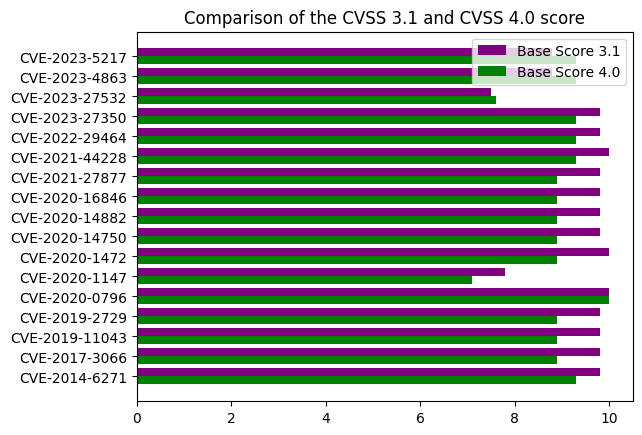

In [563]:

df = pd.read_excel("EPSSprep.xlsx")
df1 = pd.read_excel("EPSSprep.xlsx")
plt.barh(np.arange(0, len(df)) + 0.20, width=df['Base Score 3.1'], height=0.4, label="Base Score 3.1", color="purple")
plt.barh(np.arange(0, len(df)) - 0.20, width=df['Base Score 4.0'], height = 0.4, label="Base Score 4.0", color="green")
plt.yticks(df.index, df['CVE'], rotation = 0)
plt.legend()
plt.title('Comparison of the CVSS 3.1 and CVSS 4.0 score')
plt.show()
tot_amount = len(df)
#read in the vectors from EPSSprep file
#cut the 4.0 vector so it has only base scores
# plot it using two diff functions

#### How does the CVSS 3.1 base score relate to CVSS 4.0 base score?

3


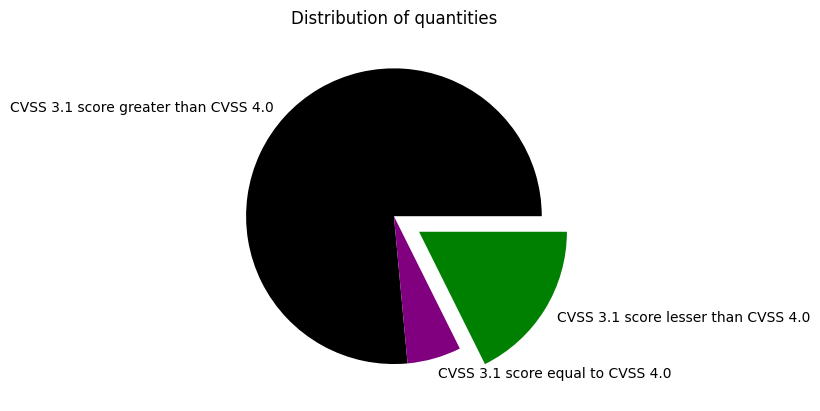

In [564]:
x = (df['Base Score 3.1'] > df['Base Score 4.0']).sum() # 3.1 score is greater than 4.0
y = (df['Base Score 3.1'] == df['Base Score 4.0']).sum() # 3.1 score is equal to 4.0
z = tot_amount - x - y # 4.0 score is greater than 3.1
print(z)
explode = [0,0,0.2]
plt.pie([x,y,z],colors=["black","purple","green"],labels=["CVSS 3.1 score greater than CVSS 4.0", "CVSS 3.1 score equal to CVSS 4.0", "CVSS 3.1 score lesser than CVSS 4.0"], explode=explode)
plt.title("Distribution of quantities")
plt.show()

#### EPSS Scores

The Exploit Prediction Scoring System (EPSS) is a data-driven effort for estimating the likelihood (probability) that a software vulnerability will be exploited in the wild.

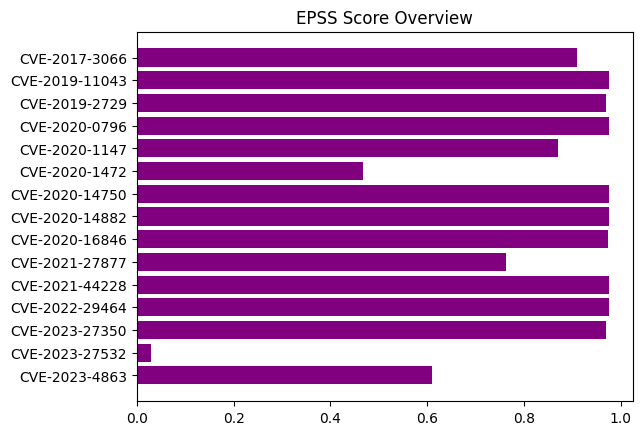

In [565]:
# EPSS Score Overview
c = list(df['CVE'])
cs = ','.join(c)
#print(cs)
r = rq.get(f"https://api.first.org/data/v1/epss?cve=`${cs}`")
arr = []
name_arr = []
for x in r.json()['data']:
    name_arr.append((x['cve']))
    arr.append(float(x['epss']))
#print(arr)
plt.barh(np.arange(0,len(arr)),width=arr, color = 'purple')
plt.yticks(np.arange(0,len(arr)), name_arr)
plt.title('EPSS Score Overview')
plt.show()

#### Does high CVSS score correlate to a high EPSS score?

In [566]:
# if it has high cvss score is it likely to get exploited
# CVSS and EPSS correlation  

#df['epss'] = arr
j = 0
for i in df['CVE']:
    if i not in name_arr:
        df = df.drop(j)
        
    j+=1

df['EPSS'] = arr # add a new column
corr = df['Base Score 4.0'].corr(df['EPSS'])
corr3 = df['Base Score 3.1'].corr(df['EPSS'])
print(f"Correlation in 4.0: " + str(corr))
print(f"Correlation in 3.1: " + str(corr3))

Correlation in 4.0: -0.050039058425069435
Correlation in 3.1: -0.22971747783826935


Conclusion from the correlation :  it seems the high CVSS score is not correlated to a high EPSS score.

### CVE-2020-1147

##### Description:
Vulnerability in .NET Framework, Microsoft SharePoint and Visual Studio when software doesn't check the source markup of a XML file input. A successful remote code exectuction of an exploit to this vulnerability grants the attacker the same rights as the user they performed the attack on.

This is the old vector: CVSS:3.1/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H
This is the new calculated vector: CVSS:4.0/AV:L/AC:L/AT:N/PR:N/UI:P/VC:H/VI:H/VA:H/SC:N/SI:N/SA:N
The new calculated vector with additional metrics is: CVSS:4.0/AV:L/AC:L/AT:N/PR:N/UI:P/VC:H/VI:H/VA...
The old base score: 7.8
The new base score: 8.5


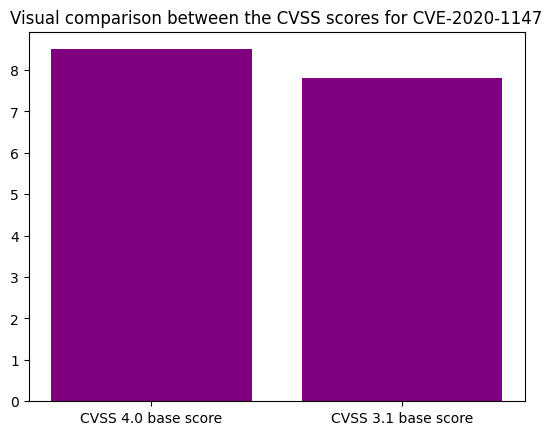

In [567]:
vector_name = 'CVE-2020-1147'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
#print(CVSS31)
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
#print(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
#print(new_vector.vector)
print(f"This is the new calculated vector: " + str(new_vector.vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
#print(cvss.CVSS4(new_vector).vector)
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2020-1472

##### Description: 
Vulnerability present in Samba in the Netlogon protocol. Exploiting it gives the attacker administrator access on a Domain Controller. The fix was setting a default value in the protocol.

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:C/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23DABF50>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 10.0
The new base score: 9.3


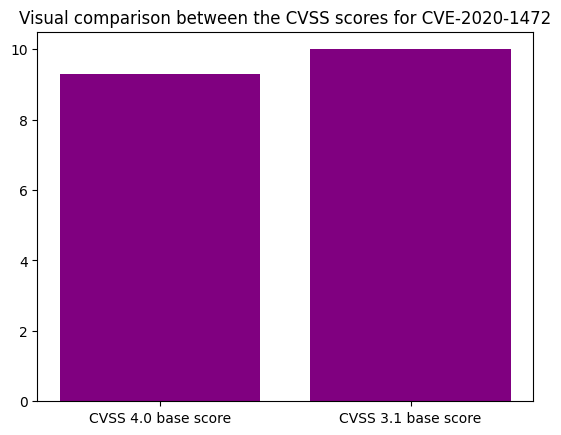

In [568]:
vector_name = 'CVE-2020-1472'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2020-14750

##### Description:
Vulnerability in Oracle WebLogic Server. When exploited by an unauthenticated remote code via HTTP allows for the attacker to bypass all security effectively making them gain admin privileges.  
(This CVE and the next one both refer to the same issue.)

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23B7AD10>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


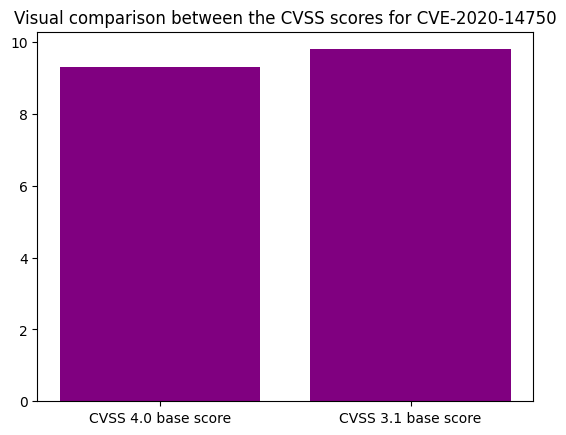

In [569]:
vector_name = 'CVE-2020-14750'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2020-14882

##### Description:
Vulnerability in Oracle WebLogic Server. When exploited by an unauthenticated remote code via HTTP allows for the attacker to bypass all security effectively making them gain admin privileges.  
(This CVE and the previous one both refer to the same issue.)

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA1DBD8F90>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


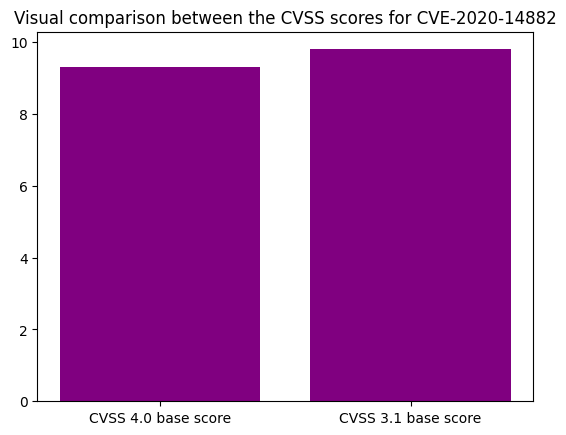

In [570]:
vector_name = 'CVE-2020-14882'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2020-16846  

##### Description:
As nvd.nist.gov states CVE-2020-16846 is an issue that was discovered in SaltStack Salt through 3002. \
Sending crafted web requests to the Salt API, with the SSH client enabled, can result in shell injections.

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23D65550>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


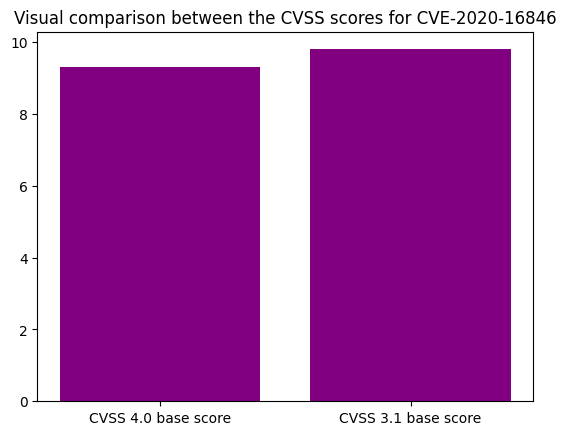

In [571]:
vector_name = 'CVE-2020-16846'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2021-27877

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23B1D6D0>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


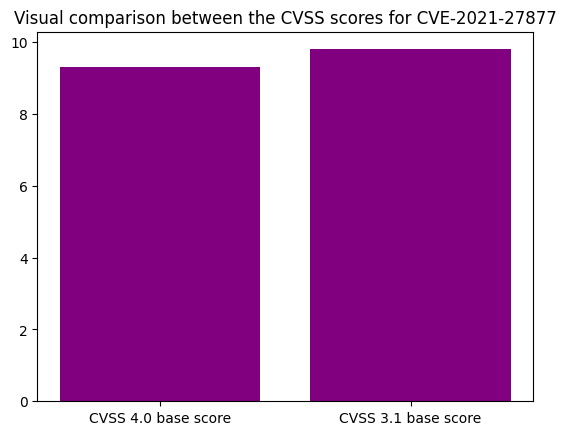

In [572]:
vector_name = 'CVE-2021-27877'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2021-44228

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:C/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA1DBBCE50>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 10.0
The new base score: 9.3


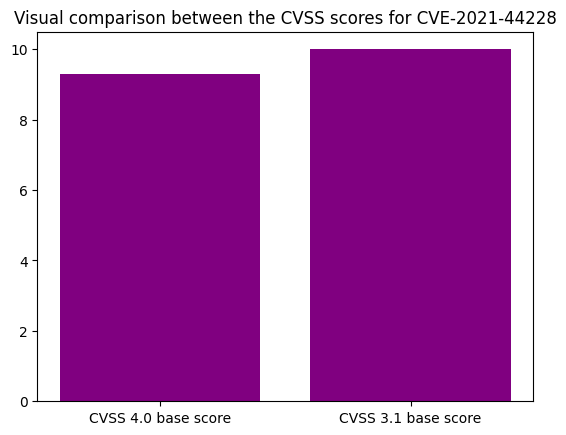

In [573]:
vector_name = 'CVE-2021-44228'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2022-29464

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA248DB850>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


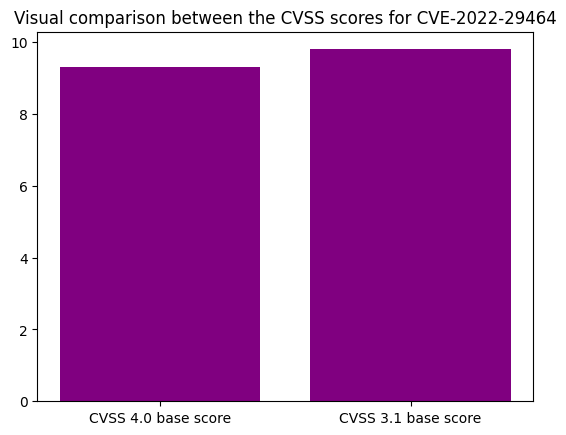

In [574]:
vector_name = 'CVE-2022-29464'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input,color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2014-6271

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA24A25650>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


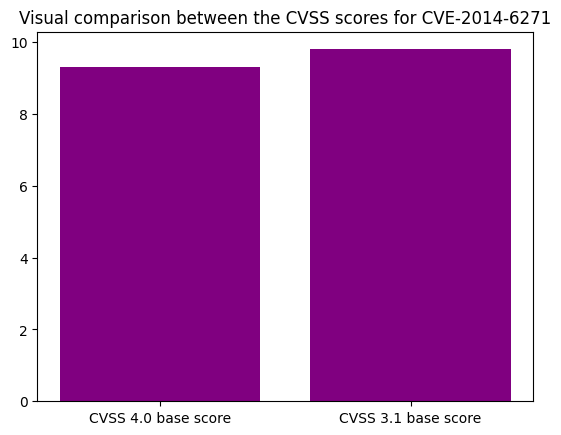

In [575]:
vector_name = 'CVE-2014-6271'
CVSS31 = df1[df1['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df1[df1["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df1[df1["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2017-3066

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23BFD390>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


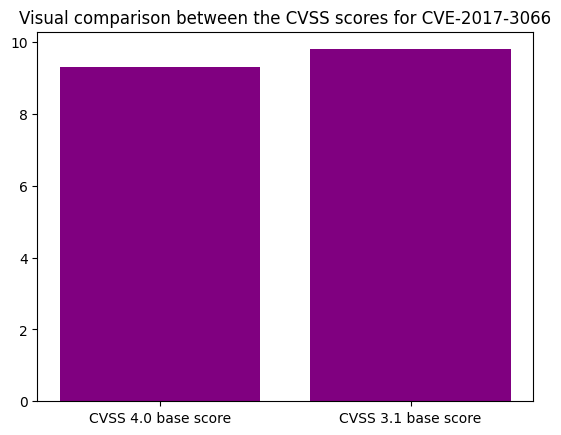

In [576]:
vector_name = 'CVE-2017-3066'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2019-11043

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA2453D350>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


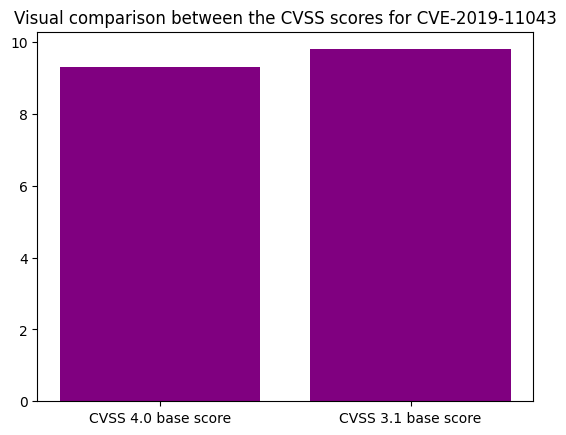

In [577]:
vector_name = 'CVE-2019-11043'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2019-2729

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA21BFC790>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


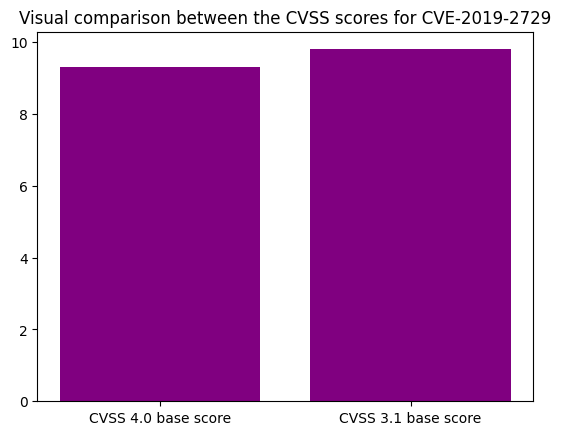

In [578]:
vector_name = 'CVE-2019-2729'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

#### CVE-2020-0796

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:C/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23CD1C50>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 10.0
The new base score: 9.3


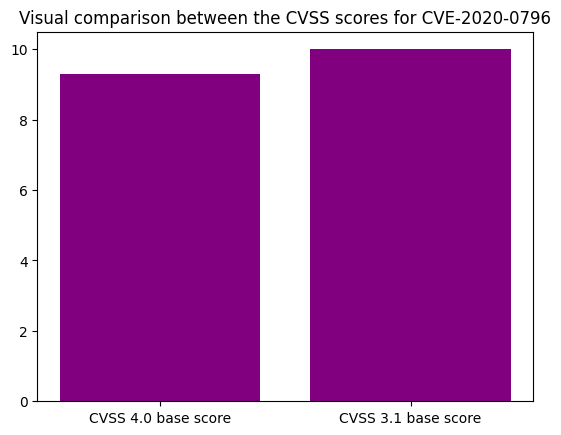

In [579]:
vector_name = 'CVE-2020-0796'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[5:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[5:]
vec = cvss.CVSS3(CVSS31[5:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2023-5217

##### Description:
Heap buffer overflow vulnerability in Google Chrome


This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA23CD1390>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 8.8
The new base score: 9.3


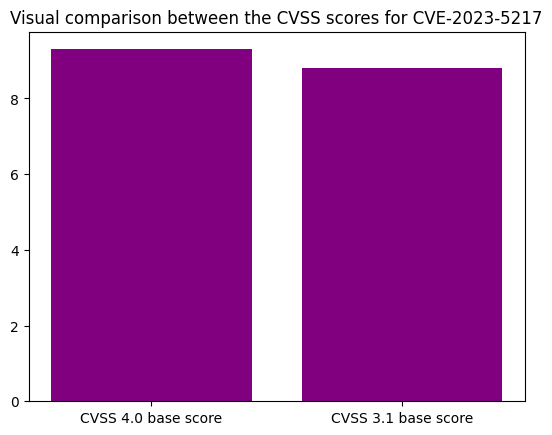

In [580]:
vector_name = 'CVE-2023-5217'
CVSS31 = df1[df1['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df1[df1["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df1[df1["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2023-4863

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA24035790>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 8.8
The new base score: 9.3


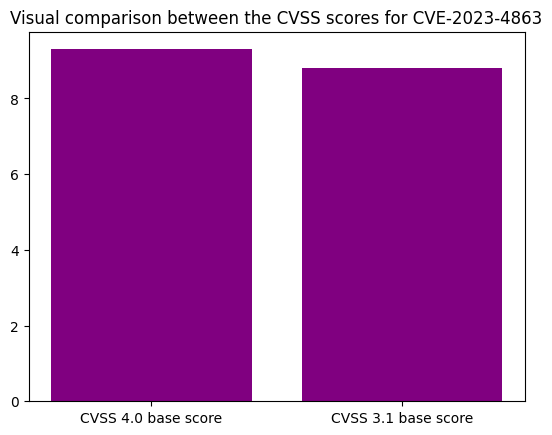

In [581]:
vector_name = 'CVE-2023-4863'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2023-27532


This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:N/A:N
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA24A3D250>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:N/VA...
The old base score: 7.5
The new base score: 8.7


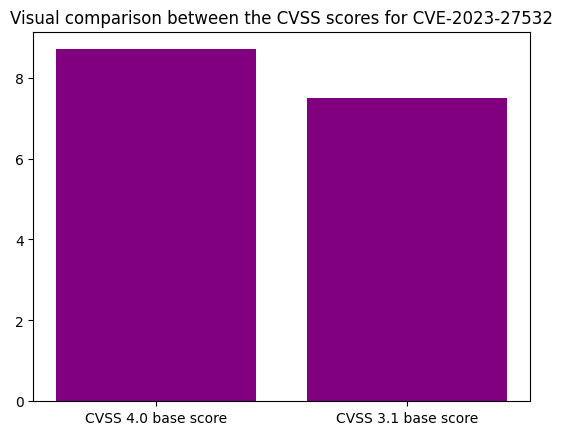

In [582]:
vector_name = 'CVE-2023-27532'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### CVE-2023-27350

This is the old vector: CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
This is the new calculated vector: <cvss.cvss4.CVSS4 object at 0x000001EA24A24290>
The new calculated vector with additional metrics is: CVSS:4.0/AV:N/AC:L/AT:N/PR:N/UI:N/VC:H/VI:H/VA...
The old base score: 9.8
The new base score: 9.3


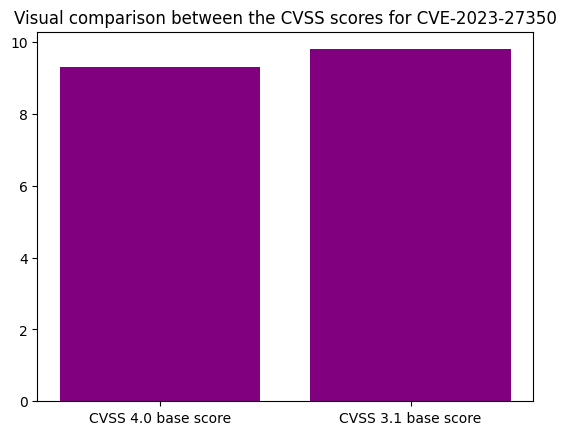

In [583]:
vector_name = 'CVE-2023-27350'
CVSS31 = df[df['CVE'] == vector_name]["Vector 3.1"]
cvss_old_score = df[df["CVE"] == vector_name]["Base Score 3.1"].to_string()[6:]
CVSS31 = CVSS31.to_string()
add_metrics = df[df["CVE"] == vector_name]["Vector 4.0 (with all the additional metrics)"].to_string()[6:]
vec = cvss.CVSS3(CVSS31[6:])
print(f"This is the old vector: {vec.vector}")
new_vector =  score_converter(vec, SC = 'N', SI = 'N', SA='N')
print(f"This is the new calculated vector: " + str(new_vector))
print(f'The new calculated vector with additional metrics is: {add_metrics}')
new_score = new_vector.base_score
print("The old base score: " + cvss_old_score)
print("The new base score: " + str(new_score))
input = [new_score,float(cvss_old_score)]
#print(input)
plt.bar([0,1], height=input, color="purple")
plt.xticks([0,1], ["CVSS 4.0 base score", "CVSS 3.1 base score"])
plt.title(f"Visual comparison between the CVSS scores for {vector_name}")
plt.show()

### Conclusion

In conclusion, CVSS 4.0 provides a more nuanced and comprehensive approach to vulnerability scoring compared to CVSS 3.1, addressing previous limitations and enhancing its applicability across various environments. These improvements enable organizations to make more informed decisions about vulnerability management and prioritization.     
CVSS 4.0's enhancements not only increase the precision of vulnerability assessments but also facilitate better alignment with modern cybersecurity threats and technologies.   
By incorporating feedback and refining its metrics, CVSS 4.0 aims to provide a standardized and adaptable framework for organizations grappling with evolving security landscapes. 